# Generate data

We start by generating the Swiss Roll dataset.

In [1]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

# Compute clustering¶

We perform AgglomerativeClustering which comes under Hierarchical Clustering without any connectivity constraints.

**Without connectivity constraints: All data points are potential candidates for merging, which may result in less interpretable clusters, especially in cases where spatial or sequential relationships are important.**

In [4]:
import time
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 0.05s
Number of points: 1500


# Plot Results 
Plotting the unstructured hierarchical clusters.

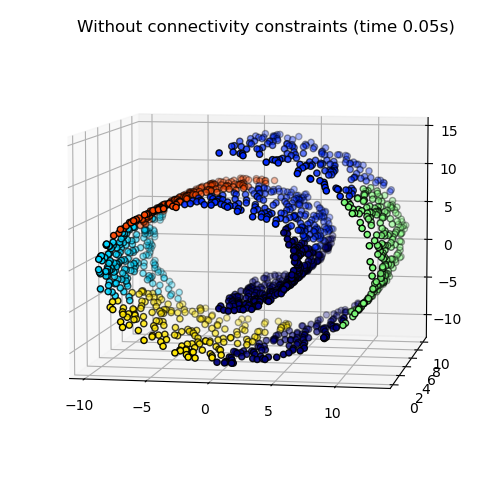

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")

# We are defining k-Nearest Neighbors with 10 neighbors¶


In [7]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# Compute clustering¶

We perform AgglomerativeClustering which comes under Hierarchical Clustering with any connectivity constraints.

**With connectivity constraints: Only neighboring data points that satisfy the specified connectivity criterion are considered for merging, leading to more meaningful clusters.**

In [8]:
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute structured hierarchical clustering...
Elapsed time: 0.10s
Number of points: 1500


# Plot Results 
Plotting the structured hierarchical clusters.

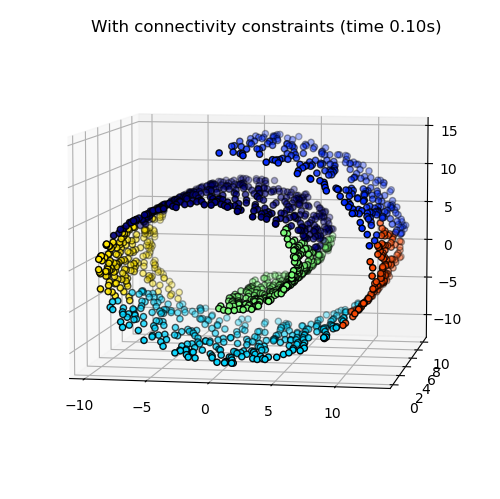

In [9]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")

plt.show()

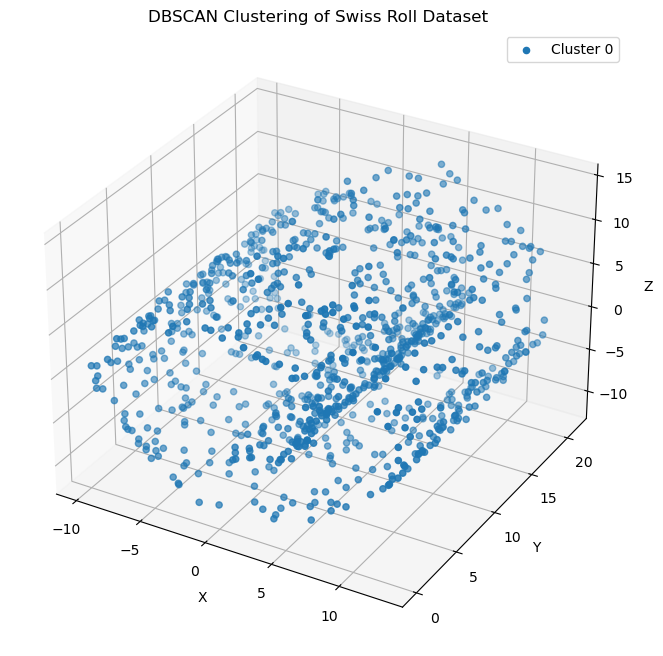

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Generate Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    if cluster != -1:  # Exclude noise points
        cluster_mask = (clusters == cluster)
        ax.scatter(X[cluster_mask, 0], X[cluster_mask, 1], X[cluster_mask, 2], label=f'Cluster {cluster}')

ax.set_title('DBSCAN Clustering of Swiss Roll Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize parameter grids
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = {}

# Iterate over parameter grids
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        
        # Check if there are at least two unique clusters
        unique_clusters = np.unique(clusters)
        if len(unique_clusters) > 1:
            # Evaluate clustering
            silhouette = silhouette_score(X, clusters)
        
            # Update best parameters if silhouette score improves
            if silhouette > best_score:
                best_score = silhouette
                best_params = {'eps': eps, 'min_samples': min_samples}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)


Best parameters: {'eps': 0.5, 'min_samples': 5}
Best silhouette score: 0.04460141286874268


C:\Users\xueer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\xueer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


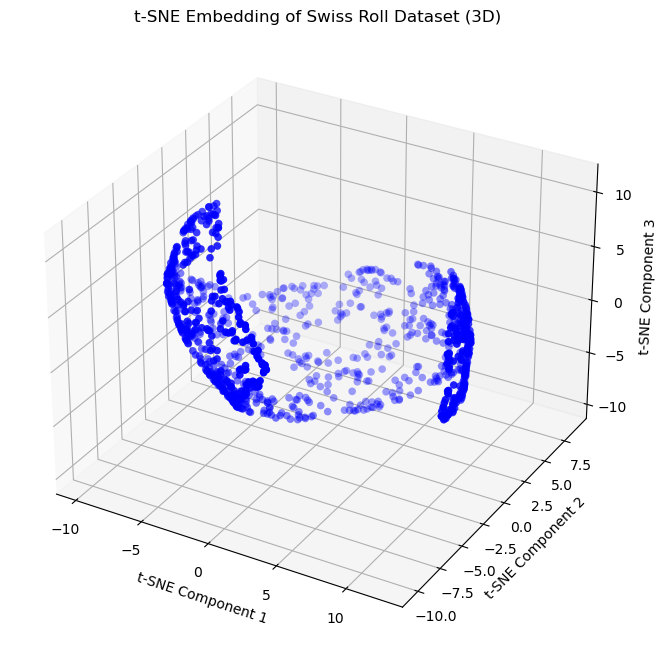

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE

# Generate Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c='b', marker='o', edgecolor='none', s=30)
ax.set_title('t-SNE Embedding of Swiss Roll Dataset (3D)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


C:\Users\xueer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


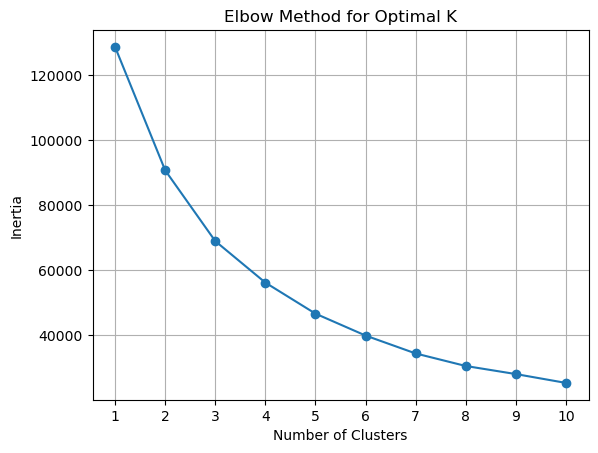

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Generate Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Compute inertia for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


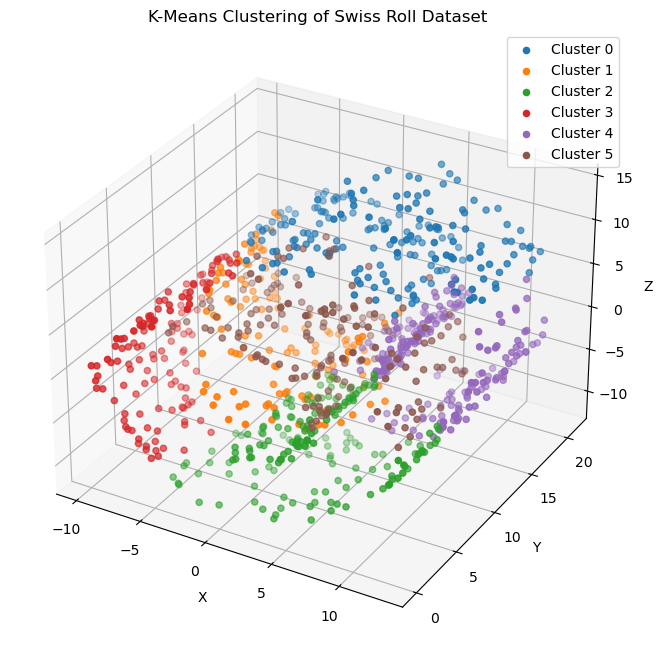

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_mask = (clusters == cluster)
    ax.scatter(X[cluster_mask, 0], X[cluster_mask, 1], X[cluster_mask, 2], label=f'Cluster {cluster}')

ax.set_title('K-Means Clustering of Swiss Roll Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
